In [25]:
# connect/mount the google drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# import the required libraries 
import numpy as np
import tensorflow as tf
import keras
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from keras.layers import Input, Lambda, Dense, Flatten, Conv2D, Activation, MaxPool2D, Dropout
from keras.models import  Model
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from google.colab.patches import cv2_imshow

In [27]:
# training and testing dataset path
train_path = "/content/drive/MyDrive/Covid19_dataset/Training_data"
test_path= "/content/drive/MyDrive/Covid19_dataset/Testing_data"


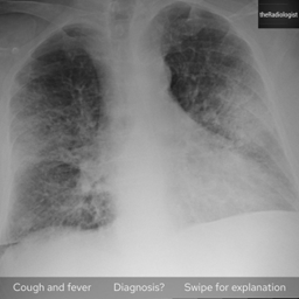

In [40]:
# covid 19 chest X-ray image
covid_img=cv2.imread("/content/drive/MyDrive/Covid19_dataset/Training_data/Covid19/COVID-1008.png",1)
cv2_imshow(covid_img)

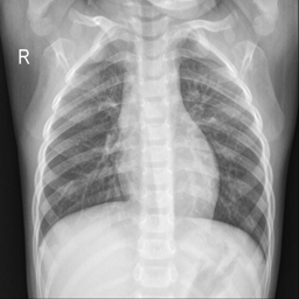

In [29]:
# Normal chest X-ray image
normal_img=cv2.imread("/content/drive/MyDrive/Covid19_dataset/Training_data/Normal/Normal-1014.png",1)
cv2_imshow(normal_img)


In [30]:
# use the image data generator to import the image from the dataset
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range= 0.1,
                                   zoom_range= 0.1,
                                   horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale = 1/255)
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Covid19_dataset/Training_data",
                                                 target_size=(224, 224),
                                                 color_mode='rgb',
                                                 class_mode='categorical',
                                                 batch_size= 80)
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/Covid19_dataset/Testing_data",
                                               target_size=(224, 224),
                                                 color_mode='rgb',
                                                 class_mode='categorical',
                                                 batch_size= 80)

Found 3490 images belonging to 2 classes.
Found 1190 images belonging to 2 classes.


In [31]:
#showing the number of class with indices
training_set.class_indices

{'Covid19': 0, 'Normal': 1}

**Sequential Model**

In [32]:
# create CNN based Nueral model 
from keras.models import Sequential

cnn_model= Sequential(Conv2D(64, kernel_size=(3,3), input_shape=(224,224,3)))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Conv2D(64, kernel_size=(3,3)))
cnn_model.add(Activation("relu"))
cnn_model.add(Conv2D(64, kernel_size=(3,3)))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Conv2D(128, kernel_size=(3,3)))
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(128, kernel_size=(3,3)))
cnn_model.add(Activation("relu"))
cnn_model.add(Conv2D(128, kernel_size=(3,3)))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.5))

cnn_model.add(Conv2D(64, kernel_size=(3,3)))
cnn_model.add(Conv2D(filters=64,kernel_size=3, activation='relu'))
cnn_model.add(MaxPool2D(pool_size=2, strides=2))

cnn_model.add(Conv2D(64, kernel_size=(3,3)))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation="relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(32, activation="relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(2, input_dim= 128,activation="softmax"))


In [33]:
# compile model with optimizer and cost function
cnn_model.compile(
     optimizer='adam', 
     loss= "categorical_crossentropy",
     steps_per_execution=None,
      metrics= ["accuracy"])

In [34]:
# Sequential model summary
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
activation_5 (Activation)    (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
activation_6 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 107, 107, 64)      36928     
_________________________________________________________________
activation_7 (Activation)    (None, 107, 107, 64)     

In [35]:
# Fit the cnn based sequential model
convo_model= cnn_model.fit(x = training_set, steps_per_epoch= 40,
                            epochs=25,  
                          validation_data = test_set)

Epoch 1/25
40/40 [==============================] - 51s 1s/step - loss: 0.6930 - accuracy: 0.5134 - val_loss: 0.6916 - val_accuracy: 0.5294
Epoch 2/25
40/40 [==============================] - 41s 1s/step - loss: 0.6819 - accuracy: 0.5830 - val_loss: 0.6915 - val_accuracy: 0.5294
Epoch 3/25
40/40 [==============================] - 41s 1s/step - loss: 0.6861 - accuracy: 0.5641 - val_loss: 0.6921 - val_accuracy: 0.5294
Epoch 4/25
40/40 [==============================] - 42s 1s/step - loss: 0.6843 - accuracy: 0.5630 - val_loss: 0.6749 - val_accuracy: 0.5849
Epoch 5/25
40/40 [==============================] - 41s 1s/step - loss: 0.5643 - accuracy: 0.7305 - val_loss: 0.7335 - val_accuracy: 0.5782
Epoch 6/25
40/40 [==============================] - 41s 1s/step - loss: 0.3848 - accuracy: 0.8297 - val_loss: 0.7360 - val_accuracy: 0.5950
Epoch 7/25
40/40 [==============================] - 41s 1s/step - loss: 0.3392 - accuracy: 0.8749 - val_loss: 0.6928 - val_accuracy: 0.5832
Epoch 8/25
40/40 [==

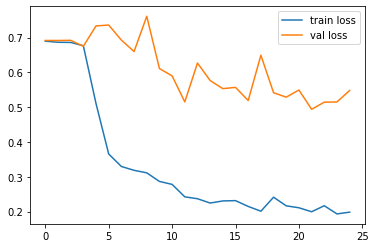

In [36]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(convo_model.history['loss'], label='train loss')
plt.plot(convo_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()




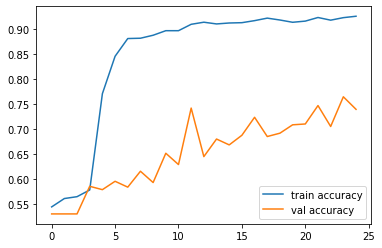

In [37]:
# plot the accuracy
plt.plot(convo_model.history['accuracy'], label='train accuracy')
plt.plot(convo_model.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


**Transfer Model : VGG19**

In [15]:
# import the VGG19 pretrained model
from keras.applications.vgg19 import VGG19

In [17]:
#add preprocessing layer to the front of VGG19
Image_size = [224,224]

vgg19_model= VGG19(include_top=False, 
           weights='imagenet',
           input_tensor=None,
           input_shape= Image_size + [3],
           pooling=None, 
           classes=2, 
           classifier_activation= "softmax")

#don't train existing weights
for layer in vgg19_model.layers:
  layer.trainable = False


In [18]:
# we can adjust last layer as per our requirement
x = Flatten()(vgg19_model.output)

prediction = Dense(2, activation= "softmax")(x)

In [19]:
#create a model object
Transfer_model = Model(inputs= vgg19_model.input, outputs = prediction)

In [20]:
# cost and optimization initialization for model
Transfer_model.compile(
                 optimizer='adam', 
                loss= "categorical_crossentropy",
                steps_per_execution=None,
                 metrics= ["accuracy"])

In [21]:
# summary of VGG19 model
Transfer_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
#fit VGG19 model 
vgg19model= Transfer_model.fit( x = training_set, 
                              steps_per_epoch= 40,
                              epochs=25,  
                            validation_data = test_set)

Epoch 1/25
40/40 [==============================] - 469s 12s/step - loss: 0.5006 - accuracy: 0.7850 - val_loss: 0.8648 - val_accuracy: 0.6782
Epoch 2/25
40/40 [==============================] - 55s 1s/step - loss: 0.2246 - accuracy: 0.9198 - val_loss: 0.3626 - val_accuracy: 0.8420
Epoch 3/25
40/40 [==============================] - 44s 1s/step - loss: 0.1355 - accuracy: 0.9563 - val_loss: 0.3580 - val_accuracy: 0.8429
Epoch 4/25
40/40 [==============================] - 43s 1s/step - loss: 0.1342 - accuracy: 0.9535 - val_loss: 0.3694 - val_accuracy: 0.8454
Epoch 5/25
40/40 [==============================] - 43s 1s/step - loss: 0.1103 - accuracy: 0.9632 - val_loss: 0.4665 - val_accuracy: 0.8168
Epoch 6/25
40/40 [==============================] - 43s 1s/step - loss: 0.1064 - accuracy: 0.9630 - val_loss: 0.2817 - val_accuracy: 0.8857
Epoch 7/25
40/40 [==============================] - 43s 1s/step - loss: 0.0880 - accuracy: 0.9688 - val_loss: 0.2797 - val_accuracy: 0.8807
Epoch 8/25
40/40 [

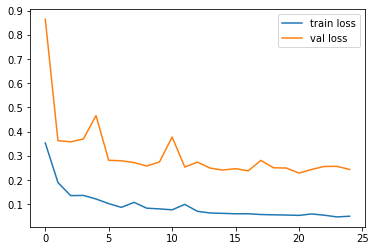

In [23]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(vgg19model.history['loss'], label='train loss')
plt.plot(vgg19model.history['val_loss'], label='val loss')
plt.legend()
plt.show()





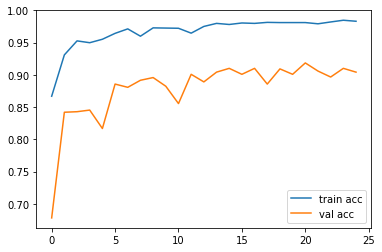

In [24]:
# plot the accuracy
plt.plot(vgg19model.history['accuracy'], label='train acc')
plt.plot(vgg19model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

**Accuracy Comparasion between Sequential model and Transfer VGG19 model**

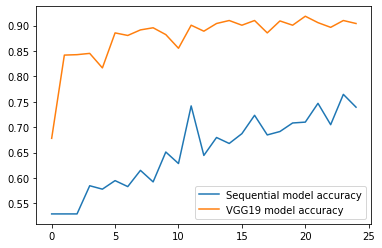

In [39]:
# compare the accuracy of both models
plt.plot(convo_model.history['val_accuracy'], label='Sequential model accuracy')
plt.plot(vgg19model.history['val_accuracy'], label='VGG19 model accuracy')
plt.legend()
plt.show()